In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("D:\LECTURER NOTES\Business Analytics\international-airline-passengers.csv")

In [4]:
dataset

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN


In [5]:
dataset.tail()

,Month,Passengers
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,NaN,NaN
145,International airline passengers: monthly tota...,NaN


In [6]:
dataset.isnull().sum()

Month         1
Passengers    2
dtype: int64

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [10]:
dataset.shape

(144, 2)

In [11]:
dataset.dtypes

Month          object
Passengers    float64
dtype: object

In [12]:
dataset['Passengers'] = dataset['Passengers'].astype('int64')

In [13]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [14]:
dataset.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [15]:
dataset

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [16]:
indexed_data = dataset.set_index(['Month'])

In [17]:
indexed_data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


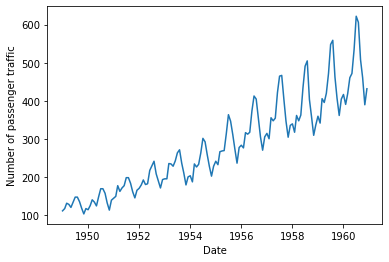

In [18]:
plt.plot(indexed_data)
plt.xlabel("Date")
plt.ylabel("Number of passenger traffic")

plt.show()
## we can see a clear trend component i-e upward trend in the data. Now next step is to check for the stationarity of the data. 

## Tests to check if the data is stationary or not

In [19]:
## Rolling mean and standard deviation

rollmean = indexed_data.rolling(window=12).mean()
rollstd = indexed_data.rolling(window=12).std()

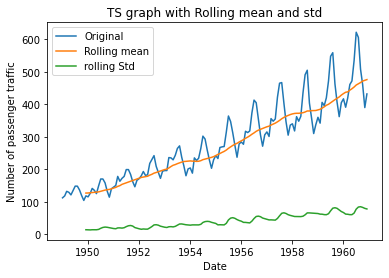

In [20]:
plt.plot(indexed_data,label="Original")
plt.plot(rollmean,label="Rolling mean")
plt.plot(rollstd,label="rolling Std")
plt.xlabel("Date")
plt.ylabel("Number of passenger traffic")
plt.title("TS graph with Rolling mean and std")
plt.legend()
plt.show()

## Rollong mean significantly shows the upward trend while variance seems
## to be almost constant. 

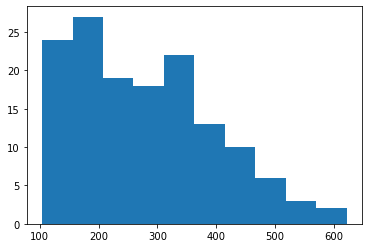

In [22]:
#sns.histplot(data=indexed_data, bins=10, color='skyblue',kde=True)


plt.hist(indexed_data)
plt.show()

In [21]:
## Generating a summary statistics

X = indexed_data.values

split = len(X) // 2
print(split)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f"Mean of first group is/Mean1: {mean1:.2f},and mean of second group is/Mean2: {mean2:.2f}")
print(f"Variance of first group is/Var1: {var1:.2f},and Variance of second group is/Var2: {var2:.2f}")

# from this , we can see that mean and variance is differenct and in not constant with time showing
# that the data is not stationary

72
Mean of first group is/Mean1: 182.90,and mean of second group is/Mean2: 377.69
Variance of first group is/Var1: 2244.09,and Variance of second group is/Var2: 7367.96


In [24]:
# Augmented Dickey fuller test

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
X = indexed_data.values
result = adfuller(X)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

# p-value is greater than 0.05 and statistics value is not closer to critical values so we reject the null hypothesis  
# and conclude that the data is not stationary

ADF Statistic: 0.815
p value: 0.992
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [24]:
print(result)

(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


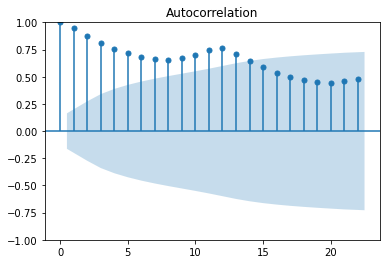

In [26]:
plot_acf(indexed_data)
plt.show()

## Data Transformation to make it stationary 

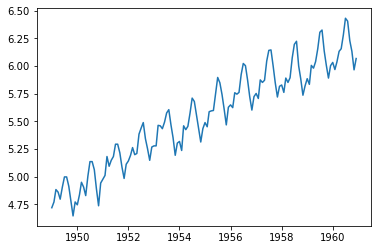

In [27]:
# Log Transformation

log_data= np.log(indexed_data)
## Plot the data after taking log
plt.plot(log_data)


In [28]:
## Mean and variance after log transformation
X = log_data.values

split = len(X) // 2

X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(f"Mean of first group is/Mean1: {mean1:.2f},and mean of second group is/Mean2: {mean2:.2f}")
print(f"Variance of first group is/Var1: {var1:.2f},and Variance of second group is/Var2: {var2:.2f}")


Mean of first group is/Mean1: 5.18,and mean of second group is/Mean2: 5.91
Variance of first group is/Var1: 0.07,and Variance of second group is/Var2: 0.05


In [28]:
## Dickey fuller test after log
log_data_1 = log_data.values

result = adfuller(log_data_1)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
    
## data is still non-stationary


ADF Statistic: -1.717
p value: 0.422
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [33]:
## computing the moving average of logged data 

In [29]:
moving_average = log_data.rolling(window=12).mean().dropna()

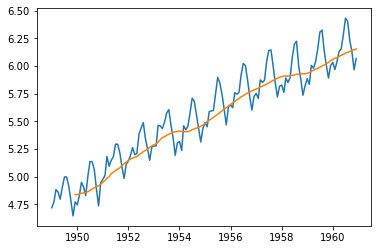

In [30]:
plt.plot(log_data,label="Logged TS")
plt.plot(moving_average,label="logged MA")
plt.show()

# not stationary but seems better than the previous one.

## there is clearly a trend component in moving average as well as in the
## Vlogged time series. 
## Sometimes subtracting the moving average from its logged time series
## removes the trend component. This method is known as de-trending.

In [31]:
## subtracting moving average from another logged times series to remove the trend component

minus = log_data - moving_average
minus.dropna(inplace=True)


result = adfuller(minus)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
    
    
## data seems to be stationary now.
    

ADF Statistic: -3.163
p value: 0.022
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


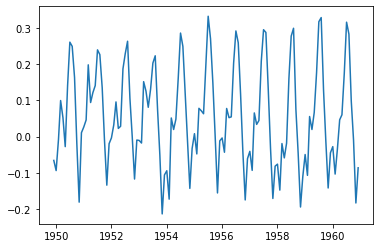

In [32]:
plt.plot(minus)

## First Difference / time shift transformation

In [38]:
## taking the first difference 
first_difference = indexed_data.diff()

In [68]:
Passengers = indexed_data['Passengers']

In [69]:
diff = Passengers - Passengers.shift()
diff

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 144, dtype: float64

In [56]:
diff.dropna(inplace=True)


In [42]:
first_difference

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [36]:
first_difference = indexed_data.diff().dropna()

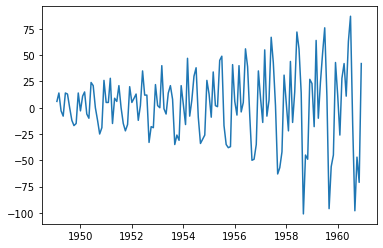

In [37]:
plt.plot(first_difference)

In [38]:
differenced_data = first_difference.values

result = adfuller(differenced_data)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

ADF Statistic: -2.829
p value: 0.054
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [39]:
moving_average_diff = first_difference.rolling(window=12).mean().dropna()
moving_std_diff = first_difference.rolling(window=12).std().dropna()

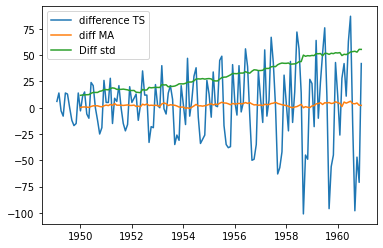

In [44]:
plt.plot(first_difference,label="difference TS")
plt.plot(moving_average_diff,label="diff MA")
plt.plot(moving_std_diff,label="Diff std")
plt.legend()
plt.show()

In [42]:
minus = first_difference - moving_average_diff
minus.dropna(inplace=True)


result = adfuller(minus)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

ADF Statistic: -3.154
p value: 0.023
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


## Square root transformation

ADF Statistic: -0.346
p value: 0.919
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


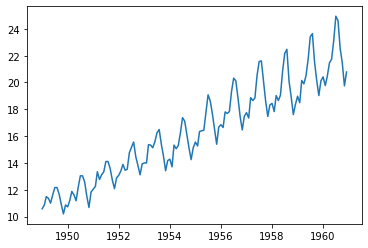

In [64]:
sqrt = np.sqrt(indexed_data)
plt.plot(sqrt)   ## square root and cube root helps in cases where the variance is not constant. these
# methods helps in stabilizing the variance of the time series. 

sqrt_1 = sqrt.values

result = adfuller(sqrt_1)
print(f'ADF Statistic: {result[0]:.3f}')
print(f'p value: {result[1]:.3f}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

## TAKING THE LOG DATA TRANSFORMATION 

#### Building ACF and PACF to identify the order of ARMA(p,q). 
#### PACF identifies the order of AR(p), ACF identifies the order of MA(q)

In [33]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf


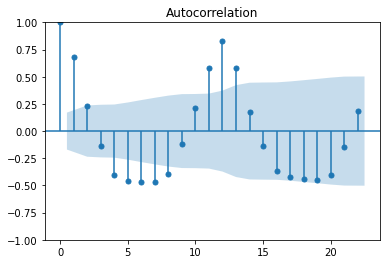

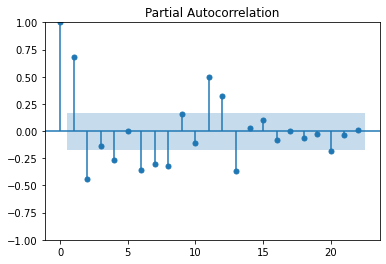

In [34]:
plot_acf(minus)
plot_pacf(minus)
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [36]:
model = ARIMA(minus,order=(2,0,1))
model_fit = model.fit()
model_fit.aic



-279.23781810899743

In [37]:
from pmdarima.arima import auto_arima

In [38]:
model = auto_arima(minus, seasonal=False, trace = True)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-252.032, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-232.914, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-235.789, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-248.543, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-253.366, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-250.471, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-253.365, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-256.118, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-252.235, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-260.773, Time=0.26 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-253.729, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-258.818, Time=0.48 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-258.835, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0]          

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

In [42]:
model = ARIMA(minus,order=(3,0,2))
model_fit = model.fit()
model_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  133
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 149.632
Date:                Sun, 31 Mar 2024   AIC                           -285.265
Time:                        01:04:25   BIC                           -265.032
Sample:                    12-01-1949   HQIC                          -277.043
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0565      0.005     10.363      0.000       0.046       0.067
ar.L1          0.7863      0.154      5.101      0.000       0.484       1.088
ar.L2          0.2886      0.203      1.424      0.155      -0.109       0.686
ar.L3         -0.5308      0.128     -4.147      0.000      -0.782      -0.280
ma.L1          0.0980      0.120      0.818      0.414      -0.137       0.333
ma.L2         -0.7543      0.088     -8.564      0.000      -0.927      -0.582
sigma2         0.0061      0.001      5.764      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 4.42
Prob(Q):                              0.59   Prob(JB):                         0.11
Heteroskedasticity (H):               1.07   Skew:                             0.08
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

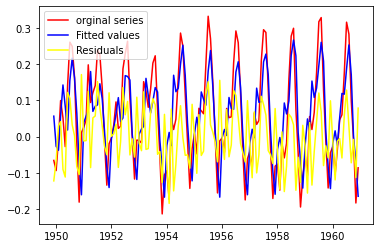

In [39]:

plt.plot(minus,color="red",label="orginal series")

plt.plot(model_fit.fittedvalues,color="Blue",label="Fitted values")

plt.plot(model_fit.resid,color="yellow",label="Residuals")

plt.legend()

plt.show()

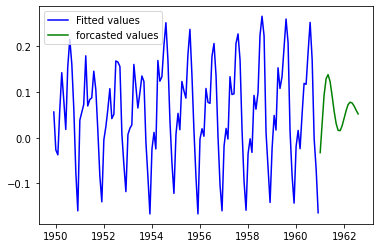

In [43]:
forecasting = model_fit.get_forecast(steps=20)

#plt.plot(minus,color="red",label="orginal series")

plt.plot(model_fit.fittedvalues,color="Blue",label="Fitted values")


plt.plot(forecasting.predicted_mean, label= "forcasted values",color="green")
plt.legend()

plt.show()

In [63]:
forecasted_conversion = np.exp(forecasting.predicted_mean)
minus_conversion = np.exp(minus)


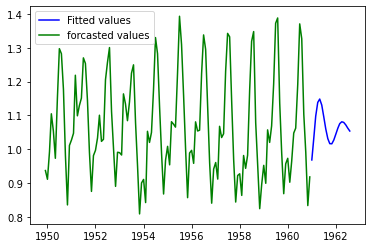

In [52]:
plt.plot(forecasted_conversion,color="Blue",label="Fitted values")


plt.plot(minus_conversion, label= "forcasted values",color="green")
plt.legend()

plt.show()

In [41]:
from sklearn.metrics import mean_squared_error


# Assuming 'forecast' contains the forecasted values and 'actual' contains the actual values
rmse = np.sqrt(mean_squared_error(minus, model_fit.fittedvalues))
print("RMSE:", rmse)

# our forcasted values are only 0.078 units away from the actual values, indicating a good forecast. 

RMSE: 0.08159979157676635


In [59]:
minus.max()

Passengers    0.331509
dtype: float64

In [60]:
minus.min()

Passengers   -0.212786
dtype: float64

In [ ]:
## Checking different order model

In [135]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [88]:
model = ARIMA(minus,order=(3,1,0))
model_fit = model.fit()
model_fit.aic

-216.903974999362

In [93]:
model = ARIMA(minus,order=(0,1,1))
model_fit = model.fit()
model_fit.aic

-217.98529621526728

In [147]:
model = ARIMA(minus,order=(4,1,3))
model_fit = model.fit()
model_fit.aic

-283.26285959273497